# Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import DiadFit as pf
pf.__version__


'1.0.5'

# Setup the folder access and paths

In [2]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# #Folder to save figures

figpath=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_K21'+slash+'Processing figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

# #Folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_K21'+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

# This compiles all the Raman data into one file, and exports

## First create the function

In [3]:

## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)

def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                print(file)
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

## Now run the function

In [4]:
K21 = compile_Raman_sessions(path=MasterFolder+slash+"Data"+slash+"Data_Kea_Uwe_Litt"+slash+"Data_K21"+slash+"Raman",sheet_name='Sheet1',keyword='Raman_session')

Raman_session_October 26, 2022_fitted_2025-01-24.xlsx
Raman_session_October 28, 2022_fitted_2025-01-24.xlsx
Raman_session_November 2, 2022_fitted_2025-01-24.xlsx
Raman_session_November 1, 2022_fitted_2025-01-24.xlsx


# Now let's tidy , filter negative densities and test files if present, then export

In [5]:
# filter out bad ones. 
K21 = K21[(~K21['filename'].str.contains('test'))&(K21['Density g/cm3']>0)]

K21['date_object']=pd.to_datetime(K21['date'])

K21=K21.sort_values(by=['date_object', 'filename'])

K21=K21.reset_index(drop=True)

# K21['filename_4merge'] = K21['filename'] + '_index' + K21.index.astype(str)

K21.to_clipboard(excel=True, index=False)

K21.to_excel(compilation_folder+'/'+"K21_Raman_allreps.xlsx")

K21


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values,date_object
0,K21-51rep1,0.134861,0.006878,0.005694,0.003858,103.090608,0.014369,0.000555,0.014389,12.075,...,NaN,NaN,NaN,0.025656,0.010964,42833,0.997895,0.997890,0.997901,2022-10-26
1,K21-51rep2,0.141104,0.004592,0.002465,0.003874,103.106364,0.006222,0.000554,0.006210,12.095,...,NaN,NaN,NaN,0.041454,0.017596,43222,0.997891,0.997885,0.997896,2022-10-26
2,K21-51rep3,0.133693,0.004951,0.003106,0.003855,103.087661,0.007838,0.000553,0.007835,12.131,...,NaN,NaN,NaN,0.032495,0.013846,43515,0.997887,0.997882,0.997892,2022-10-26
3,K21-53-FI#4,0.017623,0.007732,0.006662,0.003925,102.794730,0.016813,0.000545,0.016841,19.972,...,NaN,NaN,NaN,NaN,NaN,48313,0.997834,0.997829,0.997840,2022-10-26
4,K21-54-FI#2,0.102444,0.004640,0.002654,0.003807,103.008795,0.006697,0.000553,0.006689,11.984,...,NaN,NaN,NaN,NaN,NaN,51970,0.997802,0.997796,0.997807,2022-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K21-75-FI#3,0.093220,0.003950,0.001073,0.003802,102.985516,0.002709,0.000584,0.002650,12.075,...,NaN,NaN,NaN,NaN,NaN,55596,0.997912,0.997906,0.997917,2022-11-02
76,K21-77-FI#1,0.126727,0.003979,0.001040,0.003840,103.070079,0.002626,0.000598,0.002562,12.017,...,69.076366,Spline,0.342661,NaN,NaN,60228,0.997904,0.997898,0.997909,2022-11-02
77,K21-78b-FI#2,0.005353,0.060983,0.060854,0.003972,102.763764,0.153578,0.000589,0.153899,12.076,...,NaN,NaN,NaN,NaN,NaN,58134,0.997906,0.997901,0.997912,2022-11-02
78,K21-78b-FI#3,0.010526,0.010695,0.009938,0.003951,102.776820,0.025081,0.000590,0.025127,12.077,...,NaN,NaN,NaN,NaN,NaN,58452,0.997906,0.997900,0.997912,2022-11-02


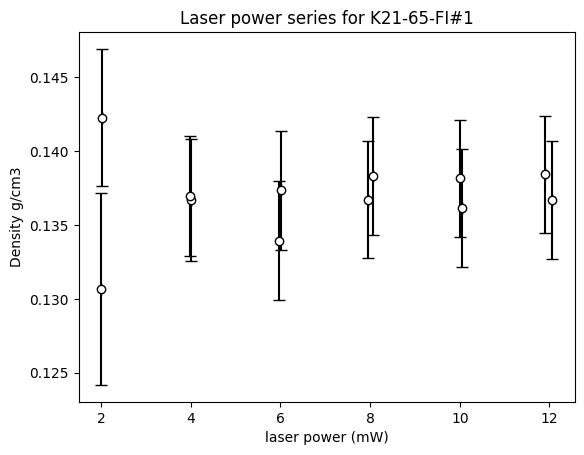

In [6]:
sub=K21[K21['filename'].str.contains('K21-65')]

plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
plt.xlabel('laser power (mW)')
plt.ylabel('Density g/cm3')
plt.title('Laser power series for K21-65-FI#1')
plt.savefig(figpath+slash+"Laser power series for K21-65-FI#1")

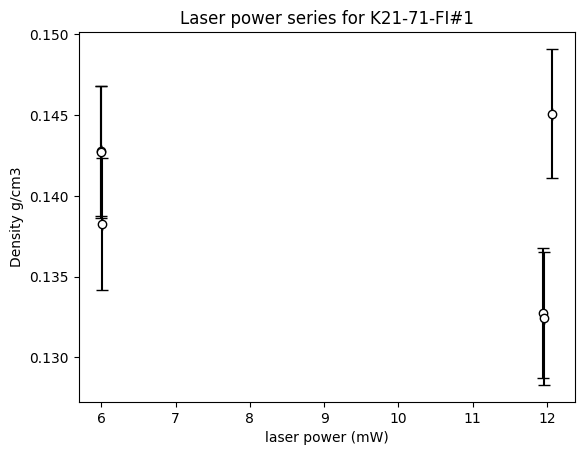

In [7]:
sub=K21[K21['filename'].str.contains('K21-71')]

plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
plt.xlabel('laser power (mW)')
plt.ylabel('Density g/cm3')
plt.title('Laser power series for K21-71-FI#1')
plt.savefig(figpath+slash+"Laser power series for K21-71-FI#1")

## Now we merge the names to match with probe AND filter shitty analyses (sigma>0.04 and very low power)

In [8]:
rep_FI_names=pd.read_excel('Helper files/'+'Helperfile_K21.xlsx',sheet_name='Sheet1')
K21_reps = pd.merge(K21, rep_FI_names, on=['filename', 'date_object','sec since midnight'])

#filter out really low power ones (<4mW) since uncertainty not good
K21_reps=K21_reps[(K21_reps['power (mW)']>3)&~(K21['σ Density g/cm3']>0.04)]
K21_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Region,FI#,Sample_crystal,Sample_crystal_region,FI_name,Name_on_EPMA,EBSD_simple_name,EBSD_grainID,EBSDname+grainID,EBSD_comment
0,K21-51rep1,0.134861,0.006878,0.005694,0.003858,103.090608,0.014369,0.000555,0.014389,12.075,...,NaN,NaN,K21_51,K21_51,K21_51,K21-51_1,NaN,NaN,NaN,NaN
1,K21-51rep2,0.141104,0.004592,0.002465,0.003874,103.106364,0.006222,0.000554,0.006210,12.095,...,NaN,NaN,K21_51,K21_51,K21_51,K21-51_1,NaN,NaN,NaN,NaN
2,K21-51rep3,0.133693,0.004951,0.003106,0.003855,103.087661,0.007838,0.000553,0.007835,12.131,...,NaN,NaN,K21_51,K21_51,K21_51,K21-51_1,NaN,NaN,NaN,NaN
3,K21-53-FI#4,0.017623,0.007732,0.006662,0.003925,102.794730,0.016813,0.000545,0.016841,19.972,...,NaN,FI#4,K21_53,K21_53,K21_53_FI#4,K21-53_4,NaN,NaN,NaN,NaN
4,K21-54-FI#2,0.102444,0.004640,0.002654,0.003807,103.008795,0.006697,0.000553,0.006689,11.984,...,NaN,FI#2,K21_54,K21_54,K21_54_FI#2,K21-54_2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,K21-75-FI#2_r2,0.100320,0.003891,0.000815,0.003805,103.003435,0.002057,0.000584,0.001977,12.020,...,NaN,FI#2,K21_76,K21_76,K21_76_FI#2,K21-76_2,NaN,NaN,NaN,NaN
75,K21-75-FI#3,0.093220,0.003950,0.001073,0.003802,102.985516,0.002709,0.000584,0.002650,12.075,...,NaN,FI#3,K21_76,K21_76,K21_76_FI#3,K21-76_3,NaN,NaN,NaN,NaN
76,K21-77-FI#1,0.126727,0.003979,0.001040,0.003840,103.070079,0.002626,0.000598,0.002562,12.017,...,NaN,FI#1,K21_77,K21_77,K21_77_FI#1,K21-77_1,NaN,NaN,NaN,NaN
78,K21-78b-FI#3,0.010526,0.010695,0.009938,0.003951,102.776820,0.025081,0.000590,0.025127,12.077,...,NaN,FI#3,K21_78b,K21_78b,K21_78b_FI#3,K21-78b_3,NaN,NaN,NaN,NaN


## Now let's take mean of repeated analyses

In [9]:
grouped = K21_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = K21_reps.select_dtypes(include='number')
non_numeric_cols = K21_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_K21_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_K21_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_K21_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate K21_averageds and reindex columns to the original order
K21_averaged = pd.concat([numeric_K21_averaged_mean, non_numeric_K21_averaged], axis=1)
K21_averaged = K21_averaged.reindex(columns=K21_reps.columns)

# Add standard deviation columns after reindexing
K21_averaged = pd.concat([K21_averaged, numeric_K21_averaged_std.add_suffix('_Raman_STD')], axis=1)

# Reset index to get a DataFrame
K21_averaged = K21_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
K21_averaged = pd.merge(K21_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
K21_averaged['averaged?'] = K21_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
# K21_averaged=K21_averaged[~(K21_averaged['filename'].str.contains("186-9-118-A"))]
K21_averaged.to_excel(compilation_folder+'/'+"K21_Raman_averaged.xlsx")

K21_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,time_Raman_STD,preferred_values_Raman_STD,lower_values_Raman_STD,upper_values_Raman_STD,Region_Raman_STD,EBSD_simple_name_Raman_STD,EBSD_grainID_Raman_STD,EBSDname+grainID_Raman_STD,EBSD_comment_Raman_STD,averaged?
0,FO1_MI1-Oct2822postpin,0.093418,0.004147,0.001605,0.003803,102.986018,0.004050,0.000577,0.004014,11.974000,...,1776.959341,0.000039,0.000039,0.000039,NaN,NaN,NaN,NaN,NaN,Yes
1,K21-51rep1,0.136553,0.005473,0.003755,0.003862,103.094878,0.009476,0.000554,0.009478,12.100333,...,342.124246,0.000004,0.000004,0.000004,NaN,NaN,NaN,NaN,NaN,Yes
2,K21-53-FI#4,0.017623,0.007732,0.006662,0.003925,102.794730,0.016813,0.000545,0.016841,19.972000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,K21-54-FI#2,0.102444,0.004640,0.002654,0.003807,103.008795,0.006697,0.000553,0.006689,11.984000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,K21-54-FI#4,0.068174,0.027324,0.027057,0.003811,102.922308,0.068284,0.000559,0.068433,11.973000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,K21-56-FI#1,0.084951,0.015360,0.014883,0.003801,102.964647,0.037560,0.000567,0.037639,12.089000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6,K21-57-FI#1,0.141773,0.003991,0.000954,0.003876,103.108051,0.002408,0.000574,0.002343,12.046000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7,K21-57-FI#2,0.119771,0.004482,0.002333,0.003827,103.052524,0.005888,0.000576,0.005873,12.024000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,K21-57-FI#3,0.140997,0.003988,0.000948,0.003874,103.106094,0.002392,0.000578,0.002326,12.034000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9,K21-57-FI#4,0.100352,0.004390,0.002189,0.003805,103.003517,0.005524,0.000580,0.005506,12.061000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
